In [22]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('preprocessed_dataset.csv')

In [3]:
df.head()

,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Journey Status,Reason for Delay,...,Arrival Minute_sin,Arrival Minute_cos,Arrival Second_sin,Arrival Second_cos,Actual Arrival Hour_sin,Actual Arrival Hour_cos,Actual Arrival Minute_sin,Actual Arrival Minute_cos,Actual Arrival Second_sin,Actual Arrival Second_cos
0,1,1,0,1,0,-0.728958,4,0,1,2,...,1.244730,-0.703667,0.0,0.0,-1.310340,-0.581489,-1.201801,0.462217,0.0,0.0
1,0,1,2,1,0,0.195236,5,31,2,0,...,0.766478,1.445570,0.0,0.0,-1.310340,0.113687,0.783679,0.744068,0.0,0.0
2,0,1,3,1,0,-0.520269,9,1,1,1,...,0.113173,-1.490343,0.0,0.0,-0.898486,-1.183529,-1.473955,0.086605,0.0,0.0
3,1,0,2,0,0,0.702052,4,0,2,0,...,-1.018384,0.869684,0.0,0.0,1.763783,-0.581489,-1.398059,0.220109,0.0,0.0
4,0,1,2,1,2,-0.550082,4,0,0,6,...,-0.540132,-1.279554,0.0,0.0,0.226721,1.109077,-0.014893,0.935850,0.0,0.0


In [5]:
X = df.drop('Refund Request', axis=1)
y = df['Refund Request'] 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9642857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       224
           1       0.94      0.99      0.97       224

    accuracy                           0.96       448
   macro avg       0.97      0.96      0.96       448
weighted avg       0.97      0.96      0.96       448

Confusion Matrix:
 [[211  13]
 [  3 221]]


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
log_model = LogisticRegression(class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       224
           1       0.92      0.96      0.94       224

    accuracy                           0.94       448
   macro avg       0.94      0.94      0.94       448
weighted avg       0.94      0.94      0.94       448

Confusion Matrix:
 [[206  18]
 [ 10 214]]


D:\users\moaz\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
with open('railway_random_forest_model.pkl', 'wb') as f:
    pickle.dump(model, f)

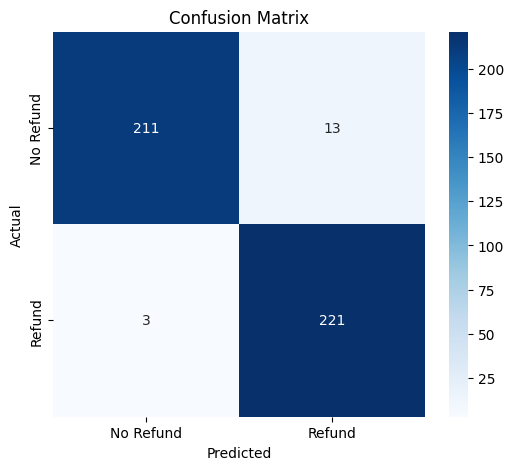

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Refund', 'Refund'], yticklabels=['No Refund', 'Refund'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

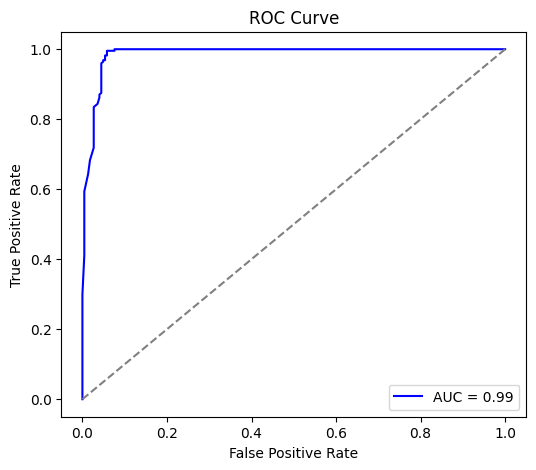

In [21]:
y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

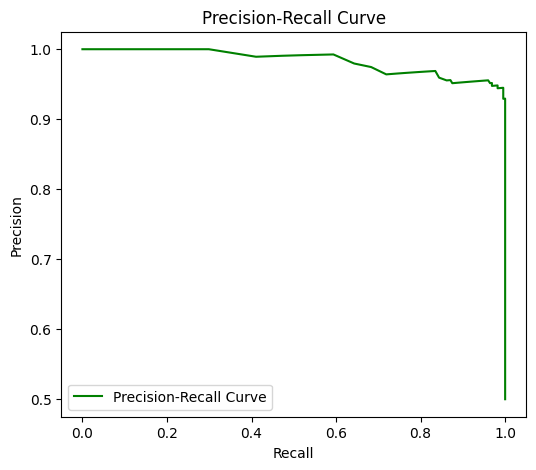

In [23]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

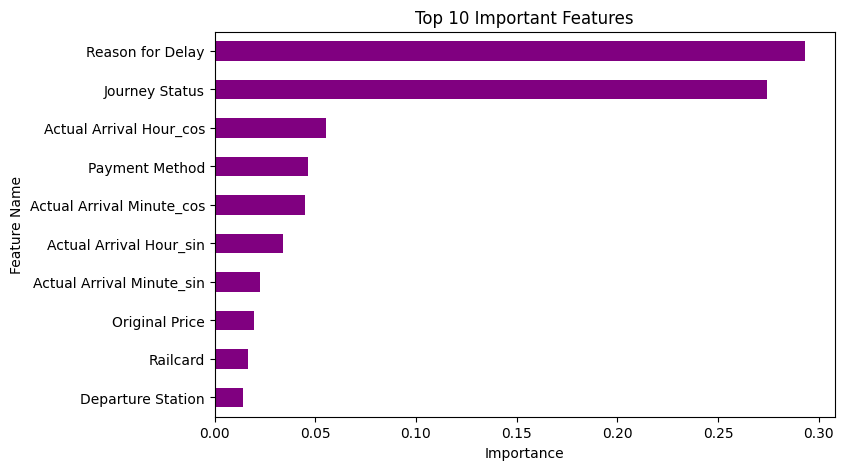

In [25]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
feature_importances[:10].plot(kind='barh', color='purple') 
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis() 
plt.show()